Simple neural network
Layers: 2, 2, 3, 2

In [3]:
import numpy as np

In [383]:
from scipy.optimize import least_squares

In [6]:
x1 = [0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7]
x2 = [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]
y1 = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y2 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def feed_forward(x, w1, w2, w3, b1, b2, b3):
    x = np.array(x).reshape(2, 1)
    z1 = np.dot(w1, x) + b1
    assert z1.shape == (2, 1)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    assert z2.shape == (3, 1)
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    assert z3.shape == (2, 1)
    a3 = sigmoid(z3)
    return a3

In [8]:
def residuum_function(x, y, w1, w2, w3, b1, b2, b3):
    a3 = feed_forward(x, w1, w2, w3, b1, b2, b3)
    y = np.array(y).reshape(2, 1)
    return np.linalg.norm(a3 - y)

In [9]:
def f(params):
    w1 = params[:4].reshape(2, 2)
    w2 = params[4:10].reshape(3, 2)
    w3 = params[10:16].reshape(2, 3)
    b1 = params[16:18].reshape(2, 1)
    b2 = params[18:21].reshape(3, 1)
    b3 = params[21:23].reshape(2, 1)
    residuums = np.zeros(len(x1))
    for idx, (x, y) in enumerate(zip(zip(x1, x2), zip(y1, y2))):
        residuum = residuum_function(x, y, w1, w2, w3, b1, b2, b3)
        residuums[idx] = np.sum(residuum)
    return residuums

In [388]:
params0 = np.random.rand(23)

In [389]:
res = least_squares(f, params0)

In [390]:
def unpack_result(params):
    w1 = params[:4].reshape(2, 2)
    w2 = params[4:10].reshape(3, 2)
    w3 = params[10:16].reshape(2, 3)
    b1 = params[16:18].reshape(2, 1)
    b2 = params[18:21].reshape(3, 1)
    b3 = params[21:23].reshape(2, 1)
    return w1, w2, w3, b1, b2, b3

In [391]:
def forward(x1, x2):
    w1, w2, w3, b1, b2, b3 = unpack_result(res.x)
    return feed_forward([x1, x2], w1, w2, w3, b1, b2, b3)

In [392]:
forward(0.1, 0.1)

array([[9.99993338e-01],
       [6.43456769e-06]])

In [88]:
N = 200
BEGIN = 0
END = 1
X1 = np.linspace(BEGIN, END, N)
X2 = np.linspace(BEGIN, END, N)
XV, YV = np.meshgrid(X1, X2)

In [394]:
def map_forward_S1(x1, x2):
    forw = forward(x1, x2)
    return forw[0] / (forw[0] + forw[1])

def map_forward_S2(x1, x2):
    forw = forward(x1, x2)
    return forw[1] / (forw[0] + forw[1])

vec_forward_S1 = np.vectorize(map_forward_S1)
vec_forward_S2 = np.vectorize(map_forward_S2)
YC1 = vec_forward_S1(XV, YV)
YC2 = vec_forward_S2(XV, YV)


In [395]:
# Y = np.array([map_forward(x1, x2) for (x1, x2) in POINTS])

In [49]:
import matplotlib.pyplot as plt

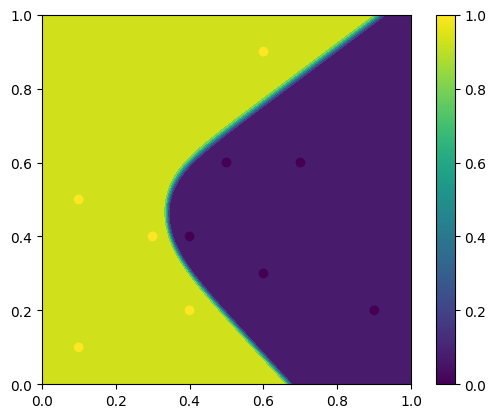

In [397]:
h = plt.contourf(XV, YV, YC1)
plt.scatter(x1, x2, c=y1)
plt.axis('scaled')
plt.colorbar()
plt.show()

In [30]:
h = plt.contourf(XV, YV, YC2)
plt.axis('scaled')
plt.colorbar()
plt.show()

NameError: name 'YC2' is not defined

Next lab
$p_{k+1} = p_k - \lambda \cdot \nabla \text{cost}(p_i)$
Na ćwiczeniach obliczyliśmy $\nabla c_i (p)$:
$\delta^{[L]} = \sigma' (z^{[l]}) \cdot (a^{[l]} - y_i)$
$\delta^{[l]} = \sigma' (z^{[l]}) \cdot (W^{[l+1]})^T \cdot \delta^{[l+1]}$
$\frac{\partial C_i}{\partial b_j^{[l]}} = \delta_j^{[l]}$
$\frac{\partial C_i}{\partial W_{j,k}^{[l]}} = \delta_j^{[l]} \cdot a_k^{[l-1]}$

Zadanie:
- Wylosować $i \in {1,..., N}$
- Obliczyć $\nabla c_i (p)$

In [200]:
p = [np.random.randn(2, 2), np.random.randn(3, 2), np.random.randn(2, 3),
     np.random.randn(2, 1), np.random.randn(3, 1), np.random.randn(2, 1)]

diffs = []


def calculate_gradient(params):
    w1, w2, w3, b1, b2, b3 = params

    i = np.random.randint(0, len(x1))
    x = [x1[i], x2[i]]
    x = np.array(x).reshape(2, 1)
    y = [y1[i], y2[i]]
    y = np.array(y).reshape(2, 1)

    z1 = np.dot(w1, x) + b1
    assert z1.shape == (2, 1)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    assert z2.shape == (3, 1)
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    assert z3.shape == (2, 1)
    a3 = sigmoid(z3)

    delta3 = (a3 - y) * sigmoid_prime(z3)
    assert delta3.shape == (2, 1)
    delta2 = np.dot(w3.T, delta3) * sigmoid_prime(z2)
    assert delta2.shape == (3, 1)
    delta1 = np.dot(w2.T, delta2) * sigmoid_prime(z1)
    assert delta1.shape == (2, 1)

    dw1 = np.dot(delta1, x.T)
    assert dw1.shape == (2, 2)
    dw2 = np.dot(delta2, a1.T)
    assert dw2.shape == (3, 2)
    dw3 = np.dot(delta3, a2.T)
    assert dw3.shape == (2, 3)
    db1 = delta1
    assert db1.shape == (2, 1)
    db2 = delta2
    assert db2.shape == (3, 1)
    db3 = delta3
    assert db3.shape == (2, 1)

    return dw1, dw2, dw3, db1, db2, db3


def feed_forward(_x1, _x2):
    x = [_x1, _x2]
    x = np.array(x).reshape(2, 1)
    z1 = np.dot(p[0], x) + p[3]
    assert z1.shape == (2, 1)
    a1 = sigmoid(z1)
    z2 = np.dot(p[1], a1) + p[4]
    assert z2.shape == (3, 1)
    a2 = sigmoid(z2)
    z3 = np.dot(p[2], a2) + p[5]
    assert z3.shape == (2, 1)
    a3 = sigmoid(z3)
    return a3[0] / (a3[0] + a3[1])


def feed_forward_vec(_x1, _x2):
    x = [_x1, _x2]
    x = np.array(x).reshape(2, 1)
    z1 = np.dot(p[0], x) + p[3]
    assert z1.shape == (2, 1)
    a1 = sigmoid(z1)
    z2 = np.dot(p[1], a1) + p[4]
    assert z2.shape == (3, 1)
    a2 = sigmoid(z2)
    z3 = np.dot(p[2], a2) + p[5]
    assert z3.shape == (2, 1)
    a3 = sigmoid(z3)
    return a3


learning_rate = 0.05
for epoch in range(int(1e6)):
    dw_1, dw_2, dw_3, db_1, db_2, db_3 = calculate_gradient(p)
    p[0] = p[0] - learning_rate * dw_1
    p[1] = p[1] - learning_rate * dw_2
    p[2] = p[2] - learning_rate * dw_3
    p[3] = p[3] - learning_rate * db_1
    p[4] = p[4] - learning_rate * db_2
    p[5] = p[5] - learning_rate * db_3

    if epoch % 100 == 0:
        diff = 0
        for i in range(len(x1)):
            diff += (feed_forward_vec(x1[i], x2[i]) - np.array([y1[i], y2[i]]).reshape(2, 1))
        diffs.append(np.linalg.norm(diff))

vec_forward_sgd = np.vectorize(feed_forward)

KeyboardInterrupt: 

In [ ]:
feed_forward(0.5, 0.5)

print(p)

In [ ]:
h = plt.contourf(XV, YV, vec_forward_sgd(XV, YV))
plt.scatter(x1, x2, c=y1)
plt.axis('scaled')
plt.colorbar()
plt.show()

In [ ]:
plt.plot(diffs[:10000])
# # Use log scale
plt.yscale('log')
len(diffs)